# **Capstone Project 2 - Bike Sharing Demand Prediction**

## **(Supervised ML - Regression Capstone Project)**

## <u>
Project by-  Kalpesh Rajput

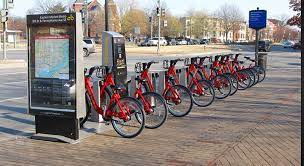



# **Project** **Summmary**  -


The "Bike Sharing Demand Prediction" project aims to develop a robust predictive model that accurately forecasts the demand for bike sharing services. By leveraging historical usage data, weather patterns, time of day, and other relevant features, this project seeks to provide valuable insights to bike sharing operators, allowing them to optimize their bike distribution, scheduling, and resource allocation strategies.

# **GitHub Link -**  https://github.com/Kalpesh-Rajput



## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

# <b> 1. Importing Necessary Libraries


In [1]:
# Let's get start with importing libraries that are very important


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from datetime import datetime
import datetime as dt

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.preprocessing import OneHotEncoder  # making categorical column in numeric format
from sklearn.preprocessing import MultiLabelBinarizer


from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.model_selection import cross_validate  # Use cross_validate when you need multiple performance metrics, fit times, and score times.
from sklearn.model_selection import cross_val_score  # Use cross_val_score when you're interested in a single performance metric and want a simple array of scores.

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor  # Use DecisionTreeRegressor for regression tasks where you want to predict continuous numerical values.
from sklearn.tree import DecisionTreeClassifier # Use DecisionTreeClassifier for classification tasks where you want to predict discrete class labels


from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor


import warnings
warnings.filterwarnings('ignore')


##<b>2. Reading Dataset

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Capstone Project -2 Bike Sharing Demand Prediction/SeoulBikeData.csv' , encoding = 'unicode_escape' , parse_dates = ['Date'])
df


,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


#<b> 3. Know Your Data

In [ ]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
df.shape

(8760, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

### <b>Observation:
* There are 14 Columns and 8760 Rows in the Dataset.
* 9 No of Numerical Variables, 1 column Datetime and 4 No of Categorical variables are there
* There No Null Values in the Dataset.

In [ ]:
print("Features of our Dataset")
df.columns

Features of our Dataset


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
#print the unique value
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

In [ ]:
# description of data:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


# <b> 4. Features description

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : datetime*

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data*.

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*






# <b>5. Preprocessing the data:

In [ ]:
# Checking is there any null value null our dataset
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [ ]:
# Checking Duplicate value in our dataset
df.duplicated().sum()

0

In [ ]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

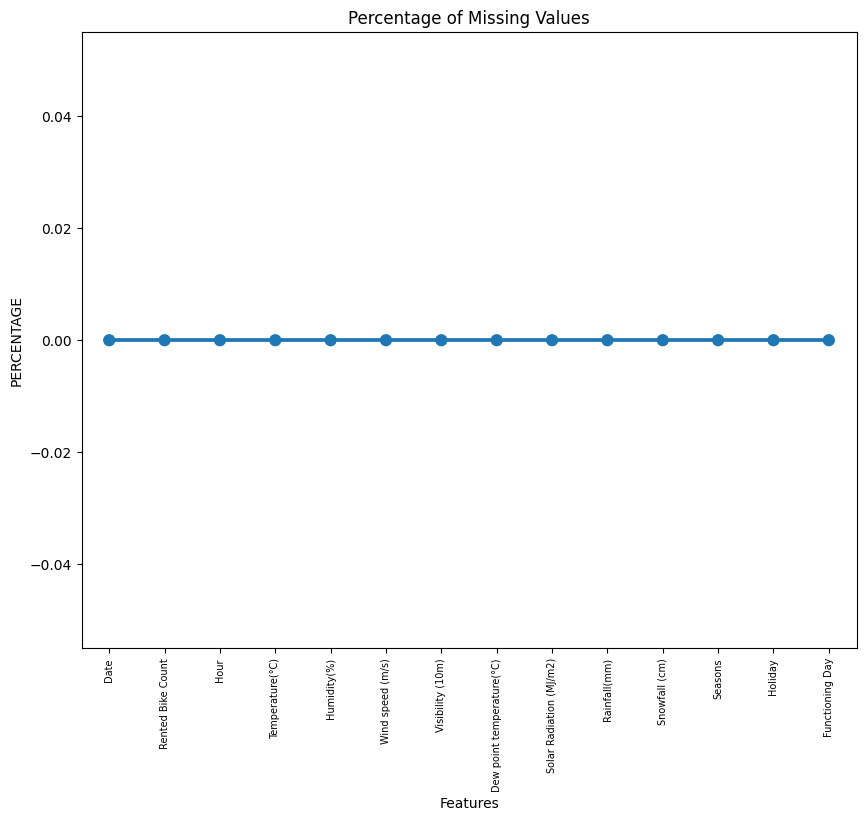

In [ ]:
missing = pd.DataFrame((df.isnull().sum() * 100 / df.shape[0]).reset_index())
missing.columns = ['Features', 'MissingPercentage']

# Create the figure and axes
figure = plt.figure(figsize=(10, 8))
ax = sns.pointplot(x='Features', y='MissingPercentage', data=missing)  # Specify x and y here
plt.xticks(rotation=90, fontsize=7)
# plt.yticks(rotation=90, fontsize=7) # we can also rotate y axis
plt.title("Percentage of Missing Values")
plt.ylabel("PERCENTAGE")
plt.show()

* ***As we can see above there are no missing value presents thankfully***

##Breaking date column

In [ ]:
# Changing the "Date" column into three "year","month","day" column

df['Date'] = df['Date'].apply(lambda x:
                              dt.datetime.strptime(x,"%d / %m / %y"))

In [ ]:
print(df['Date'].dtype)


datetime64[ns]


In [ ]:
# split day of week, month and year in three column

import datetime as dt
df['day_of_week'] = df['Date'].dt.day_name()
df['month'] = df['Date'].dt.month_name()
df['year'] = df['Date'].dt.year


In [ ]:
# split day of week, month and year in three column
df['weekdays_weekend'] = df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0)
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,month,year,weekdays_weekend
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,January,2017,0


In [ ]:
df['weekdays_weekend'].value_counts()

0    6216
1    2544
Name: weekdays_weekend, dtype: int64

In [ ]:
# Finally Check Info of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

### <b>Observation:
* In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.
* So we convert the "date" column into 3 different column i.e "year","month","day".
* The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.
* The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.


# <b> 6. Performing Some EDA:

Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend')

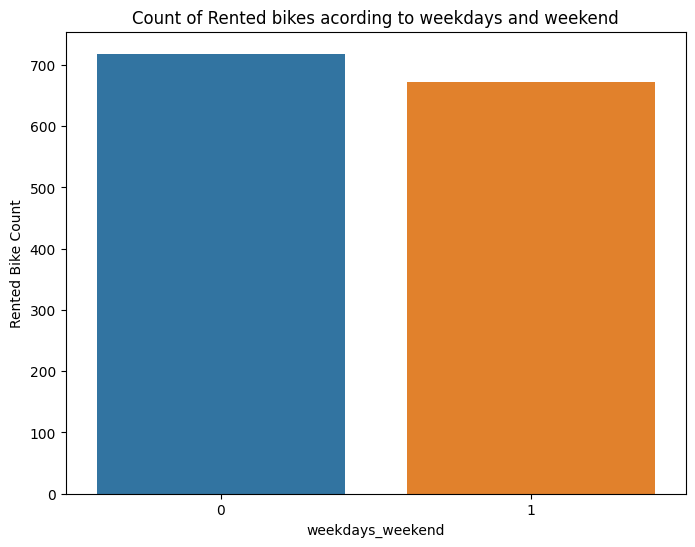

In [ ]:
#anlysis of Count of Rented bikes acording to weekdays and weekend by vizualisation

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(data=df,x='weekdays_weekend' , y = 'Rented Bike Count' , ax = ax,ci = 0)
ax.set_title('Count of Rented bikes acording to weekdays and weekend')

Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays')

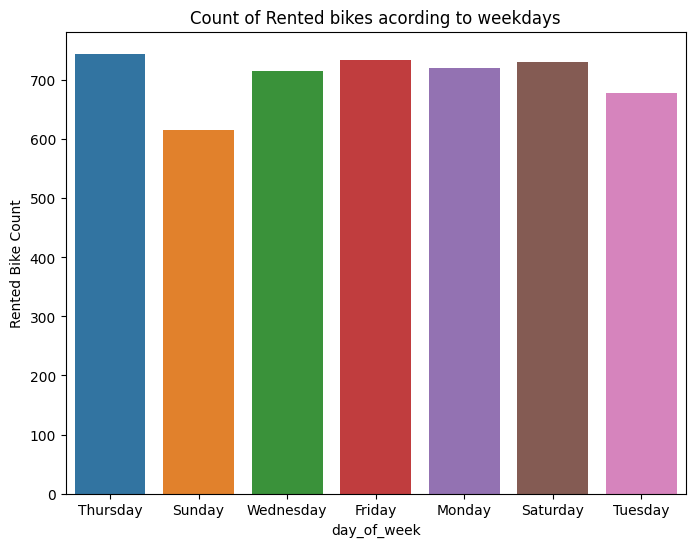

In [ ]:
#anlysis of Count of Rented bikes acording to Each Day of Week and weekend by vizualisation
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(data=df,x='day_of_week' , y = 'Rented Bike Count',ax=ax,ci=0)
ax.set_title('Count of Rented bikes acording to weekdays')

In [ ]:
#Count of Rented bikes acording to Holiday

data = df.groupby(df['Holiday'])['Rented Bike Count'].sum().reset_index()['Rented Bike Count']

print(data)


0     215895
1    5956419
Name: Rented Bike Count, dtype: int64


Text(0.5, 1.0, 'Count of Rental Bikes according to Weekends')

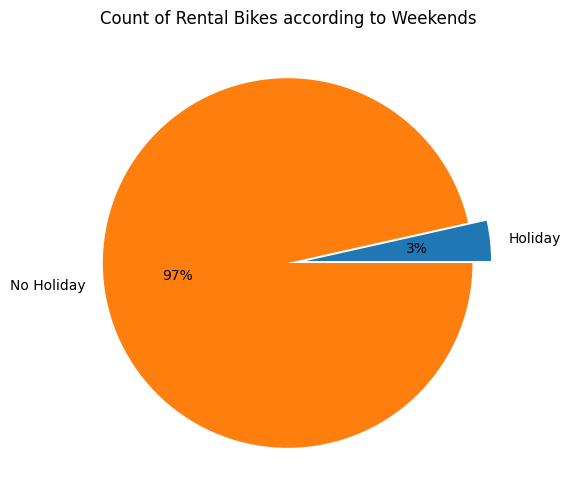

In [ ]:
#anlysis of Count of Rented bikes acording to Holiday by vizualisation
fig,ax = plt.subplots(figsize = (8,6))
plt.pie(data,autopct='%1.0f%%', labels = ['Holiday' , 'No Holiday'],explode=(0.1,0.0009))
ax.set_title('Count of Rental Bikes according to Weekends')

In [ ]:
data2 = df.groupby(df['weekdays_weekend'])['Rented Bike Count'].sum().reset_index() ['Rented Bike Count']
data2

0    4462544
1    1709770
Name: Rented Bike Count, dtype: int64

([<matplotlib.patches.Wedge at 0x79c000673eb0>,
 [Text(-0.7735707486636548, 0.9173812167316011, 'Weekdays'),
  Text(0.7096866976698479, -0.8416208179165166, 'Weekend')],
 [Text(-0.451249603387132, 0.535139043093434, '72%'),
  Text(0.38736555239332504, -0.45937864427834924, '28%')])

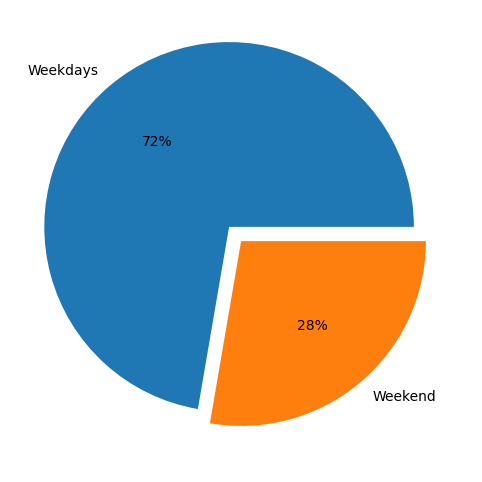

In [ ]:
#anlysis of Count of Rented bikes acording to Holiday by vizualisation
fig,ax = plt.subplots(figsize=(8,6))
plt.pie(data2,autopct='%1.0f%%',labels=['Weekdays' , 'Weekend'],explode=(0.1,0.0009))

Text(0.5, 1.0, 'Count of rented bikes according to holiday')

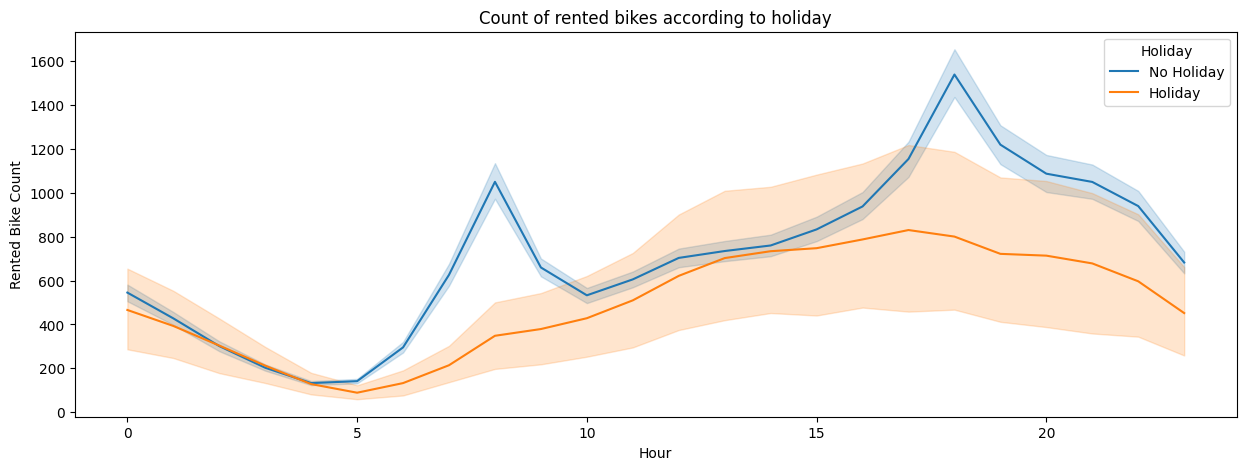

In [ ]:
fig,ax = plt.subplots(figsize = (15,5))
sns.lineplot(data=df,x='Hour',y='Rented Bike Count' , hue = 'Holiday',ax=ax)
ax.set_title('Count of rented bikes according to holiday')

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day_of_week', 'month', 'year',
       'weekdays_weekend'],
      dtype='object')

Text(0.5, 1.0, 'Count of rented bike according to Seasons')

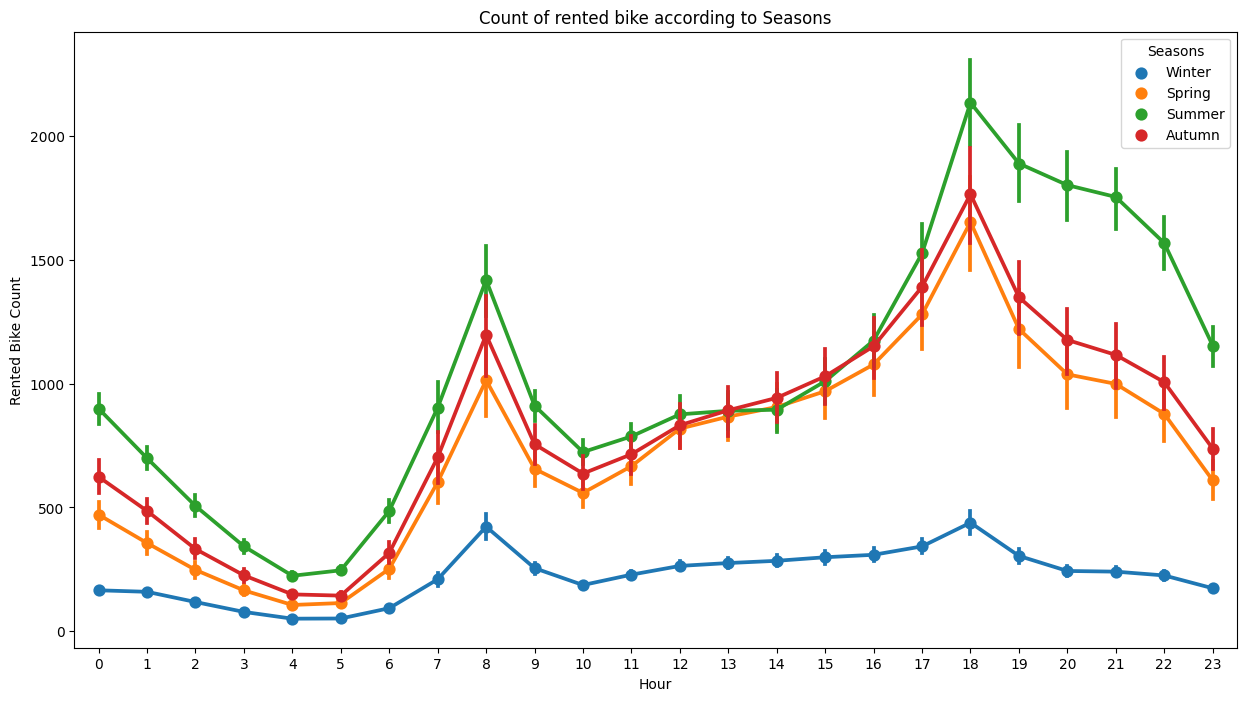

In [ ]:
fig,ax= plt.subplots(figsize = (15,8))
sns.pointplot(data = df , x = 'Hour' , y = 'Rented Bike Count' , hue = 'Seasons')
ax.set_title("Count of rented bike according to Seasons")

* ***In the above point plot which shows the use of rented bike in in four different seasons, and it clearly shows that,***
* ***In summer season the use of rented bike is high and peak time is 7am-9am and 7pm-5pm.***
* ***In winter season the use of rented bike is very low because of snowfall.***

Text(0.5, 1.0, 'Temprature Disribution')

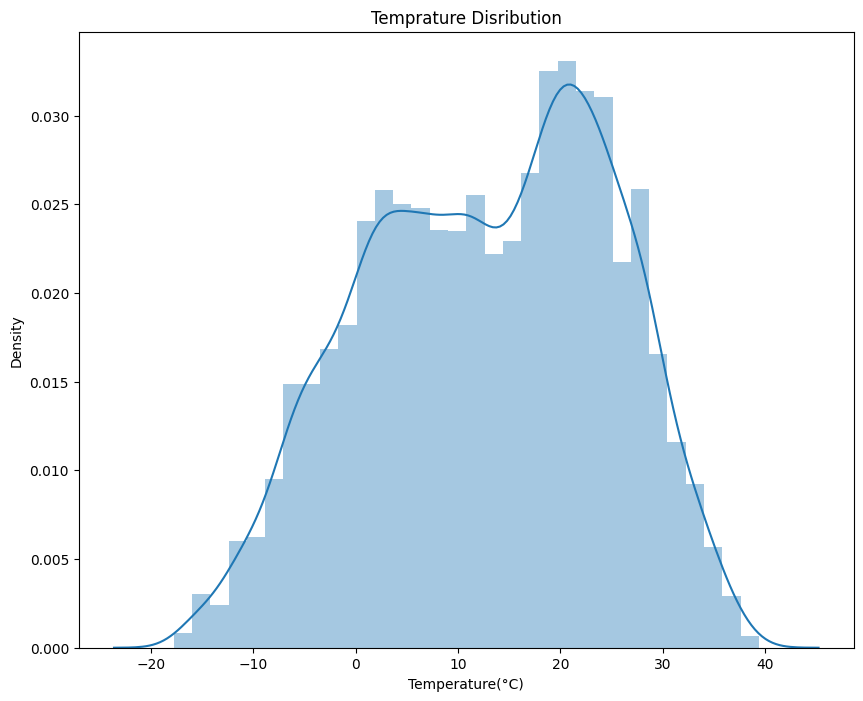

In [ ]:
# Visualization of Temprature Disribution
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(df['Temperature(°C)'],ax=ax)
ax.set_title('Temprature Disribution')

Text(0.5, 1.0, 'Count of Rented bikes acording to Temprature range')

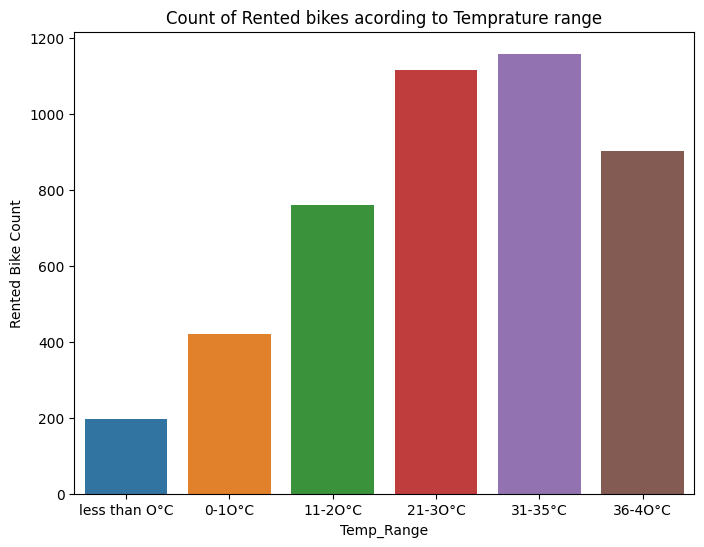

In [ ]:
#anlysis of Count of Rented bikes acording to Temprature range by vizualisation

df['Temp_Range'] = df['Temperature(°C)'].map(lambda x : 'less than O°C' if x<0 else '0-1O°C' if 0<=x<10 else '11-2O°C' if 10<=x<20 else '21-3O°C' if 20<=x<30 else '31-35°C' if 30<=x<35 else '36-4O°C' if 35<=x<40 else 'more than 4O°C')
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(data = df , x  = 'Temp_Range' , y = 'Rented Bike Count' , ax = ax , ci = 0)
ax.set_title('Count of Rented bikes acording to Temprature range')


<Axes: xlabel='Temperature(°C)', ylabel='Rented Bike Count'>

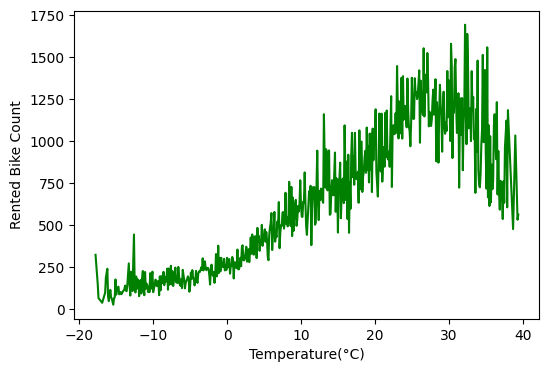

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
fig = plt.figure(figsize = (6,4))
ax = plt.gca()
sns.lineplot(data = df.groupby('Temperature(°C)').mean()['Rented Bike Count'], ax = ax , color = 'g')


* ***From the above plot we see that people like to ride bikes when it is pretty hot around 25°C in average***

<Axes: xlabel='Dew point temperature(°C)'>

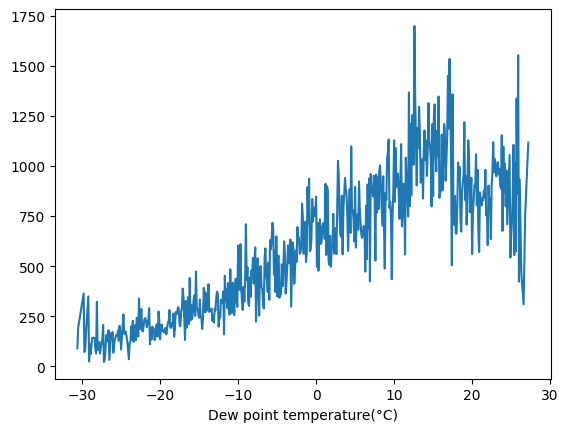

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Dew_point_temperature"

df.groupby('Dew point temperature(°C)').mean()['Rented Bike Count'].plot()

* ***From the above plot of "Dew_point_temperature' is almost same as the 'temperature' there is some similarity present we can check it in our next step.***

<Axes: xlabel='Solar Radiation (MJ/m2)'>

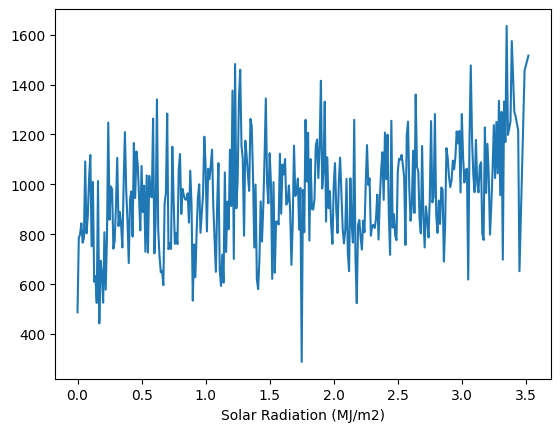

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"
df.groupby('Solar Radiation (MJ/m2)').mean()['Rented Bike Count'].plot()

* ***from the above plot we see that, the amount of rented bikes is huge, when there is solar radiation, the counter of rents is around 1000***

<Axes: xlabel='Snowfall (cm)'>

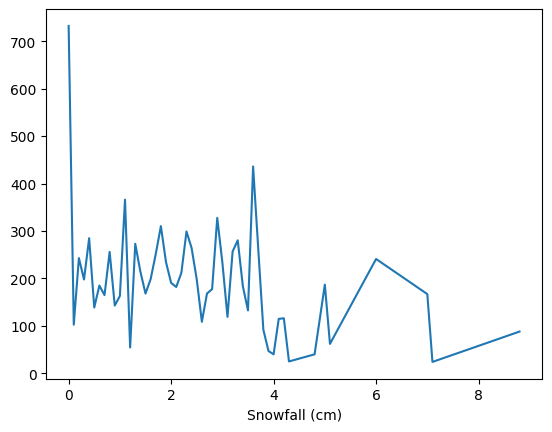

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall"
df.groupby('Snowfall (cm)').mean()['Rented Bike Count'].plot()

* ***We can see from the plot that, on the y-axis, the amount of rented bike is very low When we have more than 4 cm of snow, the bike rents is much lower***

<Axes: xlabel='Rainfall(mm)'>

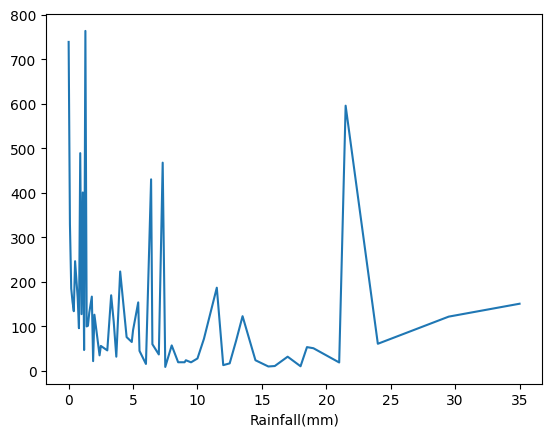

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"
df.groupby('Rainfall(mm)').mean()['Rented Bike Count'].plot()

* ***We can see from the above plot that even if it rains a lot the demand of of rent bikes is not decreasing, here for example even if we have 20 mm of rain there is a big peak of rented bikes***

<Axes: xlabel='Wind speed (m/s)'>

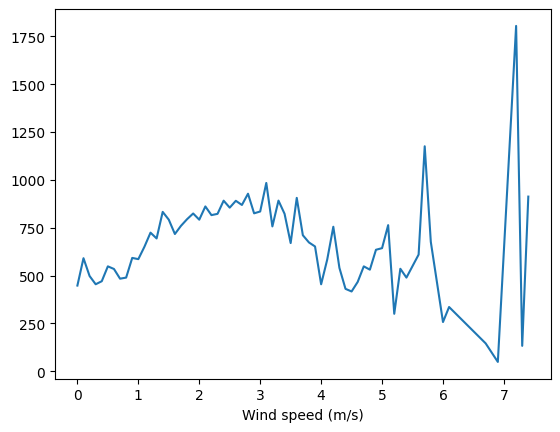

In [ ]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
df.groupby('Wind speed (m/s)').mean()['Rented Bike Count'].plot()

* ***We can see from the above plot that the demand of rented bike is uniformly distribute despite of wind speed but when the speed of wind was 7 m/s then the demand of bike also increase that clearly means peoples love to ride bikes when its little windy.***

In [3]:
numerical_columns=['Rented Bike Count','Temperature(°C)','Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)'	,'Rainfall(mm)'	,'Snowfall (cm)']

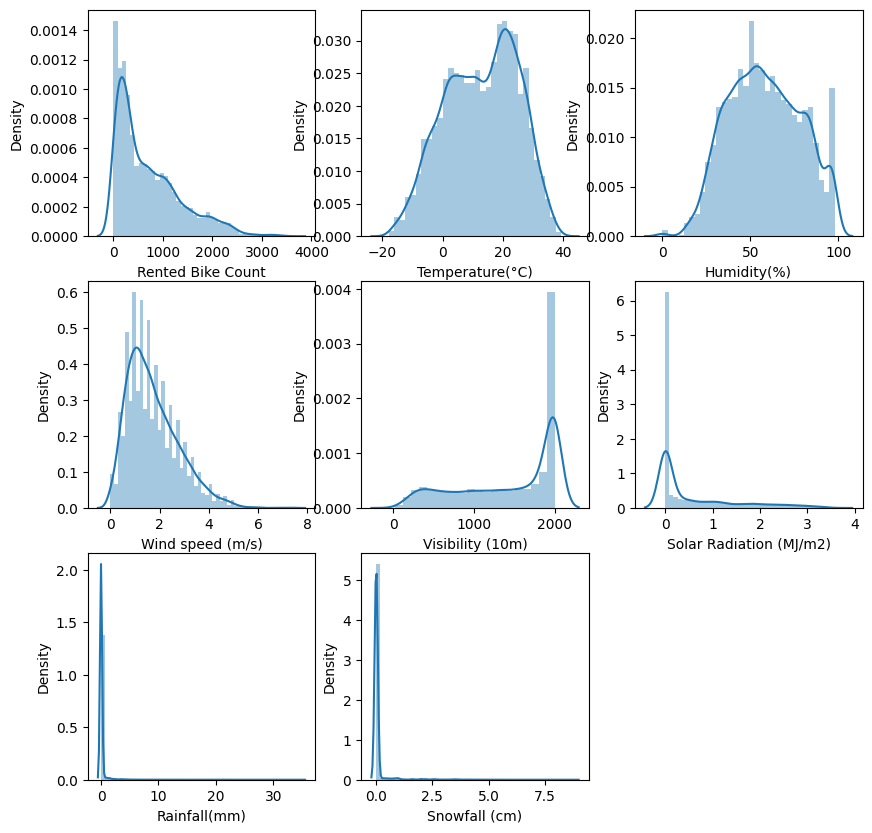

In [5]:
# for comparision we are checking the distribution
plt.figure(figsize=(10,10))
for index,item in enumerate(numerical_columns):
  plt.subplot(3,3,index+1)
  sns.distplot(df[item])

In [ ]:
fig = plt.figure(figsize =(15,6))
ax= plt.gca()
sns.barplot(data = df , x= 'month' , y ='Rented Bike Count' , ax = ax , ci = 0)
ax.set_title("Count of rented bikes according to month")

In [ ]:
#drop those column beacause we created this to do some EDA:
df=df.drop(columns=['Date','year','month','day_of_week','Temp_Range','weekdays_weekend'],axis=1)

In [ ]:
# We are left with columns that are present in our dataset before doing EDA
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

## <b>7. Analyze of Numerical variables

In [5]:
# Numerical Columns
num_col=set(df.describe().columns.to_list())-{'Rented Bike Count'}
print(num_col)

{'Dew point temperature(°C)', 'Visibility (10m)', 'Snowfall (cm)', 'Wind speed (m/s)', 'Humidity(%)', 'Rainfall(mm)', 'Temperature(°C)', 'Solar Radiation (MJ/m2)', 'Hour'}


###<b>7.1 Regression plot of Numerical variables with Rented Bike count

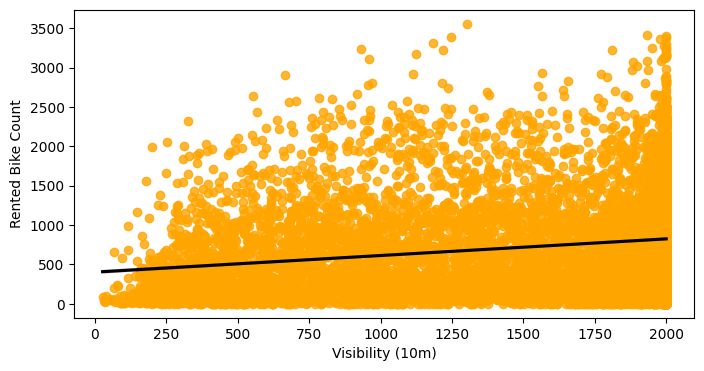

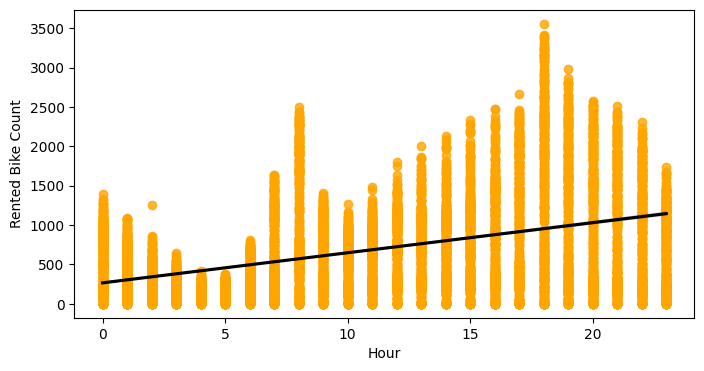

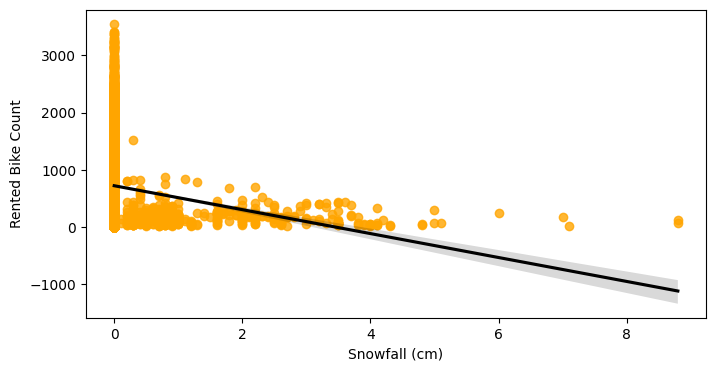

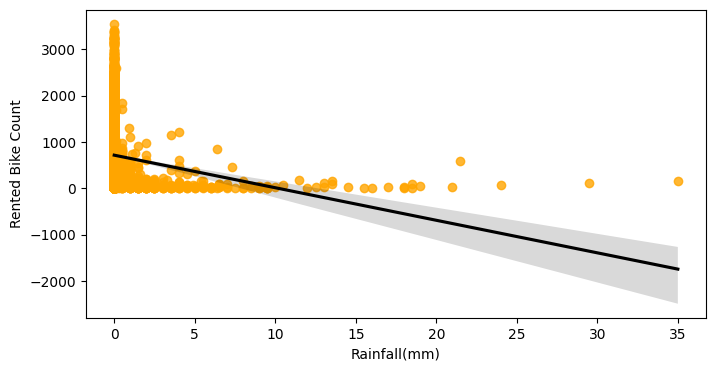

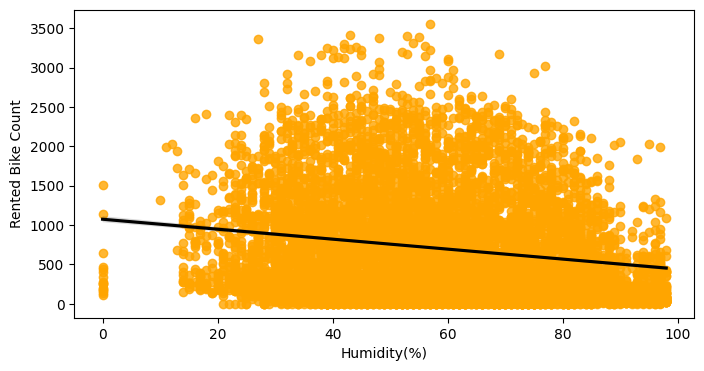

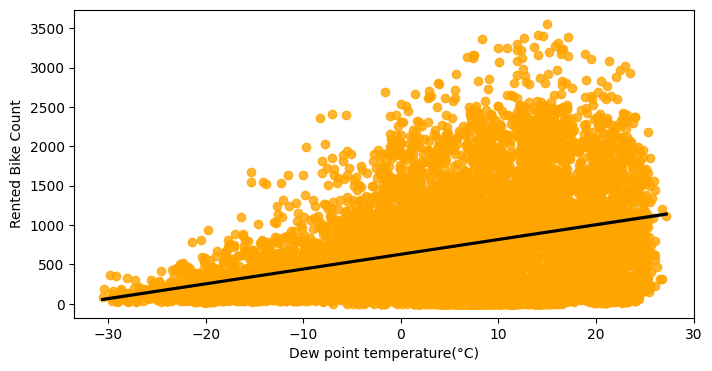

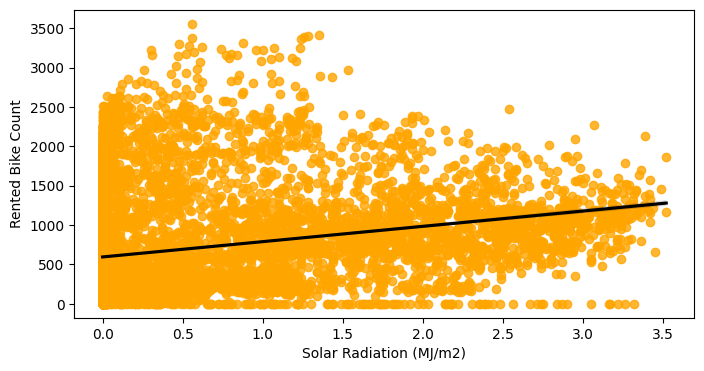

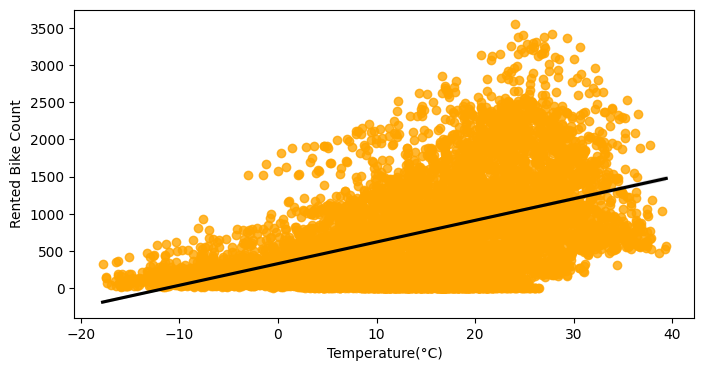

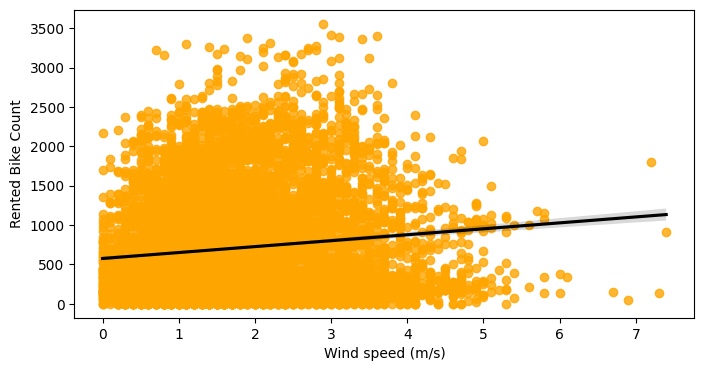

In [9]:
#printing the regression plot for all the numerical features
for col in num_col :
  fig,ax = plt.subplots(figsize = (8,4))
  sns.regplot(x=df[col] , y = df['Rented Bike Count'] , scatter_kws = {'color' : 'orange'} , line_kws = {'color' : 'black'})

* ***From the above regression plot of all numerical features we see that the columns  'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.***


* ***which means the rented bike count increases with increase of these features.***
* ***'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increase.***

##**7.2 Normalise Rented_Bike_Count column data**




* ***The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data***

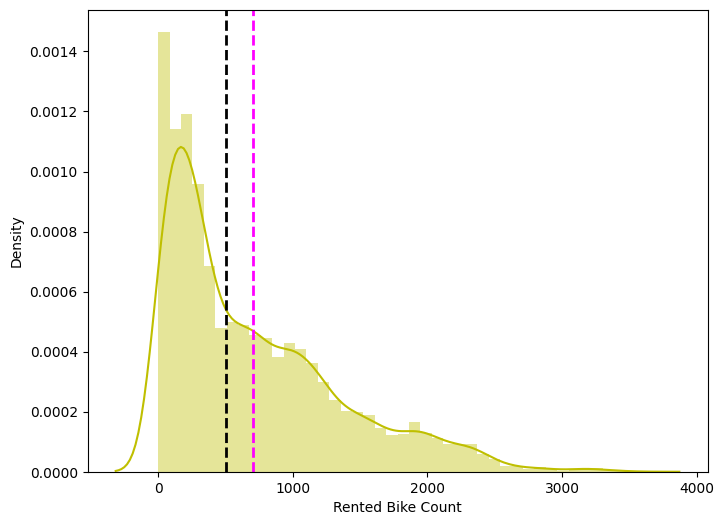

In [10]:
#Distribution plot of Rented Bike Count

plt.figure(figsize = (8,6))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax = sns.distplot(df['Rented Bike Count'] , hist = True , color = 'y')
ax.axvline(df['Rented Bike Count'].mean() , color = "magenta" , linestyle = "dashed" , linewidth = 2)
ax.axvline(df['Rented Bike Count'].median(), color = 'black' , linestyle = 'dashed' , linewidth = 2)
plt.show()

* ***The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.***

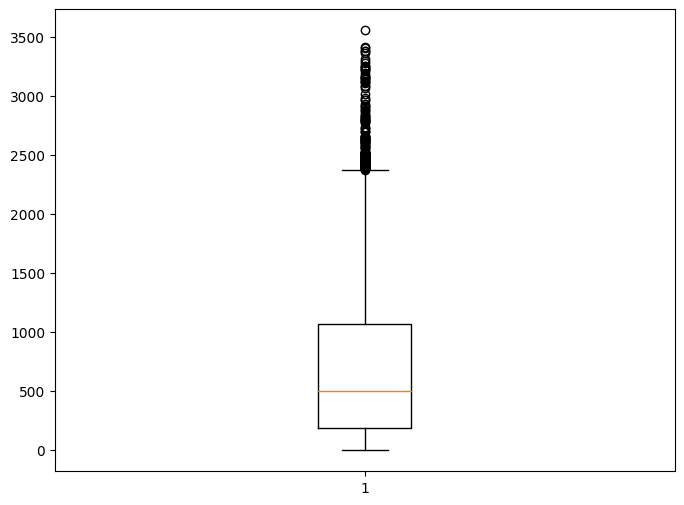

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize = (8,6))
plt.ylabel = ['Rented Bike Count']
plt.boxplot(x = df['Rented Bike Count'])
plt.show()

* ***The above boxplot shows that we have detect outliers in Rented Bike Count column***

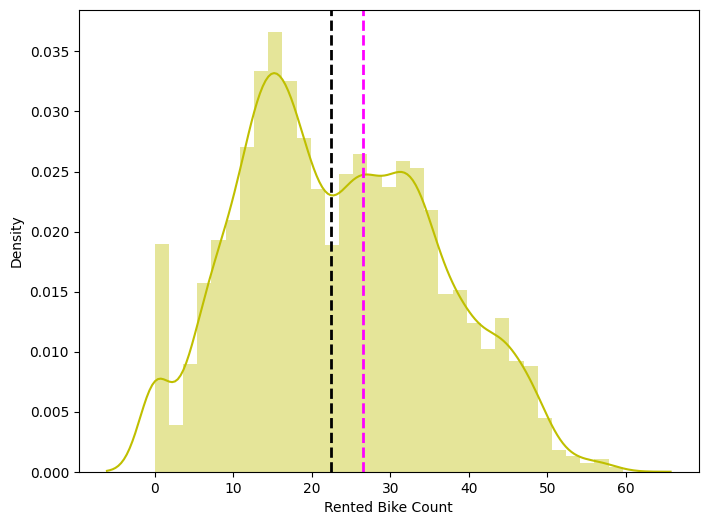

In [ ]:
plt.figure(figsize=(8,6))
plt.xlabel('Rented Bike Count')
ax =sns.distplot(np.sqrt(df['Rented Bike Count']) ,hist = True, color = 'y')
ax.axvline(np.sqrt(df['Rented Bike Count'].mean()) , color = 'magenta' , linestyle = 'dashed' , linewidth = 2)
ax.axvline(np.sqrt(df['Rented Bike Count'].median()) , color = 'black' , linestyle = 'dashed' , linewidth = 2)
plt.show()

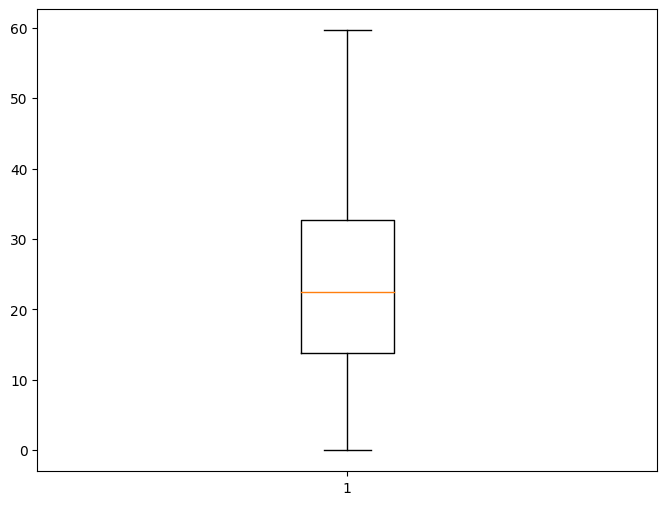

In [ ]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize = (8,6))
plt.ylabel = ['Rented Bike Count']
plt.boxplot(x = np.sqrt(df['Rented Bike Count']))
plt.show()

Text(0.5, 1.0, 'Square root')

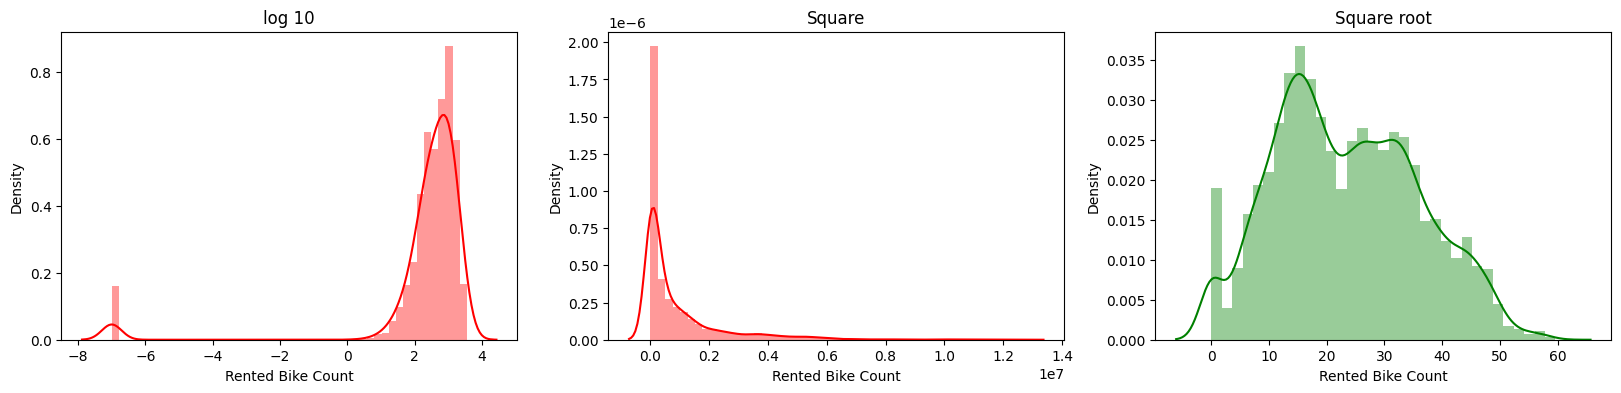

In [ ]:
#Finding Normalize Plot
fig,axes = plt.subplots(1,3,figsize=(20,4))
sns.distplot(np.log10(df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("Square")
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

* ***After applying Square root to the Rented Bike Count column, we find that there is no outliers present.***

###**7.3 Checking of Correlation between variables**


In [ ]:
# Correlation with Rented Bike Count
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Hour                         0.410257
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

<Axes: >

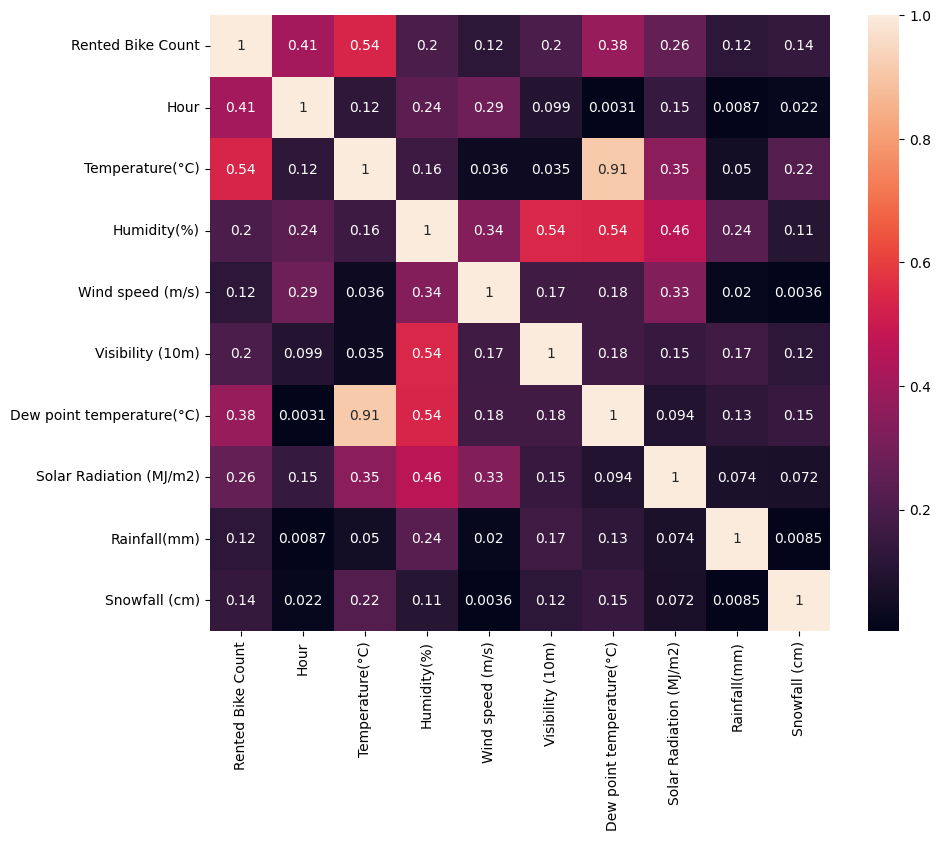

In [ ]:
# using seaborn heatmap for ploting correlation graph
fig  = plt.figure(figsize = (10,8))
ax = plt.gca()
sns.heatmap(abs(df.corr()),ax=ax,annot = True)

### <b>Observation:
 * From the Heat map, we got high Corelation Between Temperature and Dew Point Temperatue.

### <b>7.4 Checking Multicollinearity

In [86]:
import pandas as pd
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

   return(vif)

In [ ]:
#Check Multicollinearity of Numerical Columns

calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])


,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


###<b> Observation:
* While checking Multocollinearity by using variance infuance Factor, Temperature having high VIF value. so we removed that.

In [6]:
# Final Numerical Columns

num_col = list(num_col-{'Temperature(°C)'})
num_col

['Visibility (10m)',
 'Snowfall (cm)',
 'Wind speed (m/s)',
 'Humidity(%)',
 'Hour',
 'Rainfall(mm)',
 'Solar Radiation (MJ/m2)',
 'Dew point temperature(°C)']

In [7]:
num_df = df[num_col]

In [8]:
#Final Numerical Column Dataset
num_df

,Visibility (10m),Snowfall (cm),Wind speed (m/s),Humidity(%),Hour,Rainfall(mm),Solar Radiation (MJ/m2),Dew point temperature(°C)
0,2000,0.0,2.2,37,0,0.0,0.0,-17.6
1,2000,0.0,0.8,38,1,0.0,0.0,-17.6
2,2000,0.0,1.0,39,2,0.0,0.0,-17.7
3,2000,0.0,0.9,40,3,0.0,0.0,-17.6
4,2000,0.0,2.3,36,4,0.0,0.0,-18.6
...,...,...,...,...,...,...,...,...
8755,1894,0.0,2.6,34,19,0.0,0.0,-10.3
8756,2000,0.0,2.3,37,20,0.0,0.0,-9.9
8757,1968,0.0,0.3,39,21,0.0,0.0,-9.9
8758,1859,0.0,1.0,41,22,0.0,0.0,-9.8


## <b> 8. Dealing with Categorical Columns Preprocessing:

In [9]:
# List of categorical column
cat_col_list = df.describe(include=['object']).columns.to_list()
cat_col_list



['Seasons', 'Holiday', 'Functioning Day']

In [10]:
new_cat_col = df[cat_col_list]
new_cat_col

,Seasons,Holiday,Functioning Day
0,Winter,No Holiday,Yes
1,Winter,No Holiday,Yes
2,Winter,No Holiday,Yes
3,Winter,No Holiday,Yes
4,Winter,No Holiday,Yes
...,...,...,...
8755,Autumn,No Holiday,Yes
8756,Autumn,No Holiday,Yes
8757,Autumn,No Holiday,Yes
8758,Autumn,No Holiday,Yes


In [11]:
# Data encoding with Numerical Value
encoders_nums = {"Holiday":{"Holiday":1,"No Holiday":0},
                 "Functioning Day":{"Yes":1,"No":0}}

new_cat_col = new_cat_col.replace(encoders_nums)
new_cat_col

,Seasons,Holiday,Functioning Day
0,Winter,0,1
1,Winter,0,1
2,Winter,0,1
3,Winter,0,1
4,Winter,0,1
...,...,...,...
8755,Autumn,0,1
8756,Autumn,0,1
8757,Autumn,0,1
8758,Autumn,0,1


In [12]:
# Hot Encoding remainging Categorical Feature:
cat_col_df= pd.get_dummies(new_cat_col, columns=["Seasons"])
cat_col_df

,Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0,1,0,0,0,1
1,0,1,0,0,0,1
2,0,1,0,0,0,1
3,0,1,0,0,0,1
4,0,1,0,0,0,1
...,...,...,...,...,...,...
8755,0,1,1,0,0,0
8756,0,1,1,0,0,0
8757,0,1,1,0,0,0
8758,0,1,1,0,0,0


In [13]:
#Join both Numerical and Categorical Columns Features in Final Dataset(independent variables)

final_df = pd.concat((num_df,cat_col_df) , axis = 1)
final_df

,Visibility (10m),Snowfall (cm),Wind speed (m/s),Humidity(%),Hour,Rainfall(mm),Solar Radiation (MJ/m2),Dew point temperature(°C),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2000,0.0,2.2,37,0,0.0,0.0,-17.6,0,1,0,0,0,1
1,2000,0.0,0.8,38,1,0.0,0.0,-17.6,0,1,0,0,0,1
2,2000,0.0,1.0,39,2,0.0,0.0,-17.7,0,1,0,0,0,1
3,2000,0.0,0.9,40,3,0.0,0.0,-17.6,0,1,0,0,0,1
4,2000,0.0,2.3,36,4,0.0,0.0,-18.6,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1894,0.0,2.6,34,19,0.0,0.0,-10.3,0,1,1,0,0,0
8756,2000,0.0,2.3,37,20,0.0,0.0,-9.9,0,1,1,0,0,0
8757,1968,0.0,0.3,39,21,0.0,0.0,-9.9,0,1,1,0,0,0
8758,1859,0.0,1.0,41,22,0.0,0.0,-9.8,0,1,1,0,0,0


In [14]:
#Final Dataset Columns (independent variables)
columns=final_df.describe(include= 'all').columns
columns

Index(['Visibility (10m)', 'Snowfall (cm)', 'Wind speed (m/s)', 'Humidity(%)',
       'Hour', 'Rainfall(mm)', 'Solar Radiation (MJ/m2)',
       'Dew point temperature(°C)', 'Holiday', 'Functioning Day',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')

In [15]:
#Final Dataset information (independent variables)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Visibility (10m)           8760 non-null   int64  
 1   Snowfall (cm)              8760 non-null   float64
 2   Wind speed (m/s)           8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Hour                       8760 non-null   int64  
 5   Rainfall(mm)               8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Holiday                    8760 non-null   int64  
 9   Functioning Day            8760 non-null   int64  
 10  Seasons_Autumn             8760 non-null   uint8  
 11  Seasons_Spring             8760 non-null   uint8  
 12  Seasons_Summer             8760 non-null   uint8  
 13  Seasons_Winter             8760 non-null   uint8

In [16]:
#Final indipendent variables
x=final_df
y= np.sqrt(df['Rented Bike Count'])

###<b> Observation:
* After Preprocessing of Dataset of Numerical and Categorical Column having 8760 Rows and 14 Columns(Features).

#**Model Training**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

## <b>9. Splitting Training & Testing Dataset

In [17]:
x.head()

,Visibility (10m),Snowfall (cm),Wind speed (m/s),Humidity(%),Hour,Rainfall(mm),Solar Radiation (MJ/m2),Dew point temperature(°C),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,2000,0.0,2.2,37,0,0.0,0.0,-17.6,0,1,0,0,0,1
1,2000,0.0,0.8,38,1,0.0,0.0,-17.6,0,1,0,0,0,1
2,2000,0.0,1.0,39,2,0.0,0.0,-17.7,0,1,0,0,0,1
3,2000,0.0,0.9,40,3,0.0,0.0,-17.6,0,1,0,0,0,1
4,2000,0.0,2.3,36,4,0.0,0.0,-18.6,0,1,0,0,0,1


In [18]:
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented Bike Count, dtype: float64

In [19]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2 , random_state = 0)
print(x_train.shape)
print(x_test.shape)

(7008, 14)
(1752, 14)


* The mean squared error (MSE) tells you how close a regression line is to a set of points. It does this by taking the distances from the points to the regression line (these distances are the “errors”) and squaring them.
It’s called the mean squared error as you’re finding the average of a set of errors. The lower the MSE, the better the forecast.

* MSE formula = (1/n) * Σ(actual – forecast)2
Where:

*   n = number of items,
* Σ = summation notation,
* Actual = original or observed y-value,
* Forecast = y-value from regression.

* Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors).

* Mean Absolute Error (MAE) are metrics used to evaluate a Regression Model. ... Here, errors are the differences between the predicted values (values predicted by our regression model) and the actual values of a variable.

* R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

* Formula for R-Squared
\begin{aligned} &\text{R}^2 = 1 - \frac{ \text{Unexplained Variation} }{ \text{Total Variation} } \\ \end{aligned}
​
  
* R
2
 =1−
Total Variation
Unexplained Variation
​

* Adjusted R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model.
​


## <b>10. Scaling Training and Testing Dataset with Standard Scaling


In [20]:
# Standard Scaling


scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)

x_test = scaler.fit_transform(x_test)

## <B>11. Applying Regression models

In [21]:
#Create list of Regression Model
models=[['LinearRegression: ',LinearRegression()],
        ['Lasso:',Lasso()],
        ['Ridge:',Ridge()],
        ['ElasticNet:',ElasticNet()],
        ['DecisionTreeRegressor:',DecisionTreeRegressor()],
        ['RandomForestRegressor:',RandomForestRegressor()],
        ['GradientBoostingRegressor:',GradientBoostingRegressor()],
        ['XGBRegressor:',XGBRegressor()]]


In [22]:
#Create a Function for Fitting algorithm and storing the result
model_data=[]
def calc_model_result(regressor,model_name):
  curr_model_data={}
  curr_model_data['name']=model_name
  regressor.fit(x_train,y_train)
  curr_model_data['MAE_train']=round(mean_absolute_error(y_train,regressor.predict(x_train)),2)
  curr_model_data['MAE_test']=round(mean_absolute_error(y_test,regressor.predict(x_test)),2)
  curr_model_data['r2_score_train']=round(r2_score(y_train,regressor.predict(x_train)),2)
  curr_model_data['r2_score_test']=round(r2_score(y_test,regressor.predict(x_test)),2)
  curr_model_data['RMSE score_train']=round(np.sqrt(r2_score(y_train,regressor.predict(x_train))),2)
  curr_model_data['RMSE score_test']=round(np.sqrt(r2_score(y_test,regressor.predict(x_test))),2)
  model_data.append(curr_model_data)


In [23]:
#Calculate all Model results
for name,curr_model in models:
  calc_model_result(curr_model,name)

In [24]:
model_result = pd.DataFrame(model_data)
model_result

,name,MAE_train,MAE_test,r2_score_train,r2_score_test,RMSE score_train,RMSE score_test
0,LinearRegression:,5.59,5.66,0.65,0.65,0.81,0.80
1,Lasso:,8.50,8.69,0.25,0.23,0.50,0.48
2,Ridge:,5.60,5.65,0.65,0.65,0.81,0.81
3,ElasticNet:,9.43,9.55,0.15,0.13,0.38,0.37
4,DecisionTreeRegressor:,0.00,3.66,1.00,0.80,1.00,0.90
5,RandomForestRegressor:,1.02,2.86,0.99,0.88,0.99,0.94
6,GradientBoostingRegressor:,3.32,3.51,0.87,0.86,0.93,0.92
7,XGBRegressor:,1.51,2.87,0.97,0.89,0.98,0.94


## <b>12. Hyper parameter tuning

### <b> 12.1 Lasso & Ridge

In [25]:
GridSearchCV,
#Hyper Parameter Tuning using grid search Cross Validation
models2 = [['Lasso_Hyper_tuned' , Lasso()] , ['Ridge_Hyper_tuned' , Ridge()]]
for name,curr_model in models2:
  parameters = {'alpha' : np.linspace(-10,10,100)}
  tuned_regressor = GridSearchCV(curr_model,parameters,scoring= 'neg_mean_squared_error' , cv = 5)
  calc_model_result(tuned_regressor,name)


In [26]:
#Result of all algorithm
model_result=pd.DataFrame(model_data)
model_result


,name,MAE_train,MAE_test,r2_score_train,r2_score_test,RMSE score_train,RMSE score_test
0,LinearRegression:,5.59,5.66,0.65,0.65,0.81,0.80
1,Lasso:,8.50,8.69,0.25,0.23,0.50,0.48
2,Ridge:,5.60,5.65,0.65,0.65,0.81,0.81
3,ElasticNet:,9.43,9.55,0.15,0.13,0.38,0.37
4,DecisionTreeRegressor:,0.00,3.66,1.00,0.80,1.00,0.90
5,RandomForestRegressor:,1.02,2.86,0.99,0.88,0.99,0.94
6,GradientBoostingRegressor:,3.32,3.51,0.87,0.86,0.93,0.92
7,XGBRegressor:,1.51,2.87,0.97,0.89,0.98,0.94
8,Lasso_Hyper_tuned,5.87,6.00,0.62,0.62,0.79,0.79
9,Ridge_Hyper_tuned,5.59,5.66,0.65,0.65,0.81,0.81


### <b> 12.2 Random Forest Regressor

In [27]:
#Hyper Parameter Tuning using grid search Cross Validation to find best paramter
rfr = RandomForestRegressor(random_state=1)
param_grid = {'max_depth': [8,9,10] , 'n_estimators' : [50,60,70,80,90,100]}
g_sr = GridSearchCV(estimator= rfr , param_grid=param_grid , scoring='neg_mean_squared_error' , cv = 5)
g_sr.fit(x_train,y_train)
best_param = g_sr.best_params_
print('the best parameter of random forest regressor:',best_param)

the best parameter of random forest regressor: {'max_depth': 10, 'n_estimators': 80}


In [28]:
#Hyper Parameter Tuning with best Parameter
rf_tuned_regressor = RandomForestRegressor(max_depth=best_param['max_depth'] , n_estimators=best_param['n_estimators'])
calc_model_result(rf_tuned_regressor,"RandomForestRegressor_hyper_tuned")

In [29]:
#Result of all algorithm
model_result=pd.DataFrame(model_data)
model_result

,name,MAE_train,MAE_test,r2_score_train,r2_score_test,RMSE score_train,RMSE score_test
0,LinearRegression:,5.59,5.66,0.65,0.65,0.81,0.80
1,Lasso:,8.50,8.69,0.25,0.23,0.50,0.48
2,Ridge:,5.60,5.65,0.65,0.65,0.81,0.81
3,ElasticNet:,9.43,9.55,0.15,0.13,0.38,0.37
4,DecisionTreeRegressor:,0.00,3.66,1.00,0.80,1.00,0.90
5,RandomForestRegressor:,1.02,2.86,0.99,0.88,0.99,0.94
6,GradientBoostingRegressor:,3.32,3.51,0.87,0.86,0.93,0.92
7,XGBRegressor:,1.51,2.87,0.97,0.89,0.98,0.94
8,Lasso_Hyper_tuned,5.87,6.00,0.62,0.62,0.79,0.79
9,Ridge_Hyper_tuned,5.59,5.66,0.65,0.65,0.81,0.81


Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: RANDOM FOREST')

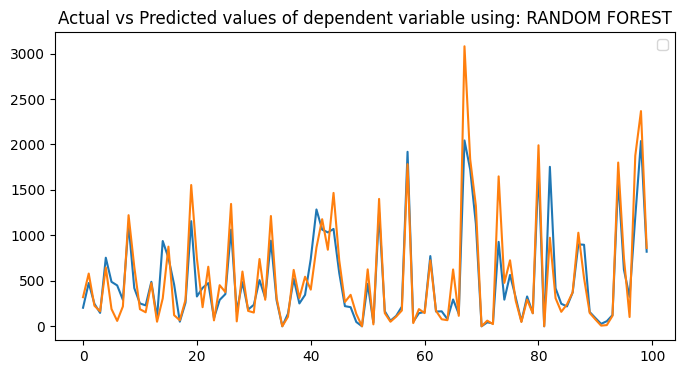

In [30]:
# Actual vs predicted values of dependent variables
y_predict = rf_tuned_regressor.predict(x_test)
plt.figure(figsize = (8,4))
plt.plot((y_predict[:100])**2)
plt.plot(np.array((y_test[:100]) **2))
plt.legend("Predicted" , "Actual")
plt.title('Actual vs Predicted values of dependent variable using: RANDOM FOREST')

###<b>12.3 XG Boosting Regressor


In [31]:
#Hyper Parameter Tuning using grid search Cross Validation to find best paramter
parameter_dict = {'n_estimators' : [50,80,100] ,
                  'max_depth' : [4,6,8],
                  'min_sample_split' : [50,100,150],
                  'min_sample_leaf' : [40,50]}

# Create an instance of the XG Boost Regressor
xg_boost = XGBRegressor()

# Grid search

xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5  , verbose = 2)

xg_grid.fit(x_train,y_train)
xg_grid.best_estimator_


Fitting 5 folds for each of 54 candidates, totalling 270 fits
[15:00:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_sample_leaf", "min_sample_split" } are not used.

[CV] END max_depth=4, min_sample_leaf=40, min_sample_split=50, n_estimators=50; total time=   0.2s
[15:00:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_sample_leaf", "min_sample_split" } are not used.

[CV] END max_depth=4, min_sample_leaf=40, min_sample_split=50, n_estimators=50; total time=   0.2s
[15:00:38] WARNING: ../src/learner.cc:767: 
Parameters: { "min_sample_leaf", "min_sample_split" } are not used.

[CV] END max_depth=4, min_sample_leaf=40, min_sample_split=50, n_estimators=50; total time=   0.2s
[15:00:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_sample_leaf", "min_sample_split" } are not used.

[CV] END max_depth=4, min_sample_leaf=40, min_sample_split=50, n_estimators=50; total time=   0.2s
[15:00:39] WARNING: ../src/learner.cc:767: 
Parameters: { "min_sample_leaf", "min_sample_s

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, min_sample_leaf=40, min_sample_split=50,
             missing=nan, monotone_constraints=None, n_estimators=50,
             n_jobs=None, num_parallel_tree=None, ...)

From above code we get - XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [36]:

#Hyper Parameter Tuning with best Parameter

xg_tuned_regressor = XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)
calc_model_result(xg_tuned_regressor,'XGBRegressor_Hyper_tuned:')

[15:05:58] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_leaf", "min_samples_split" } are not used.



In [33]:
#Result of all algorithm

model_result  = pd.DataFrame(model_data)
model_result

,name,MAE_train,MAE_test,r2_score_train,r2_score_test,RMSE score_train,RMSE score_test
0,LinearRegression:,5.59,5.66,0.65,0.65,0.81,0.80
1,Lasso:,8.50,8.69,0.25,0.23,0.50,0.48
2,Ridge:,5.60,5.65,0.65,0.65,0.81,0.81
3,ElasticNet:,9.43,9.55,0.15,0.13,0.38,0.37
4,DecisionTreeRegressor:,0.00,3.66,1.00,0.80,1.00,0.90
5,RandomForestRegressor:,1.02,2.86,0.99,0.88,0.99,0.94
6,GradientBoostingRegressor:,3.32,3.51,0.87,0.86,0.93,0.92
7,XGBRegressor:,1.51,2.87,0.97,0.89,0.98,0.94
8,Lasso_Hyper_tuned,5.87,6.00,0.62,0.62,0.79,0.79
9,Ridge_Hyper_tuned,5.59,5.66,0.65,0.65,0.81,0.81


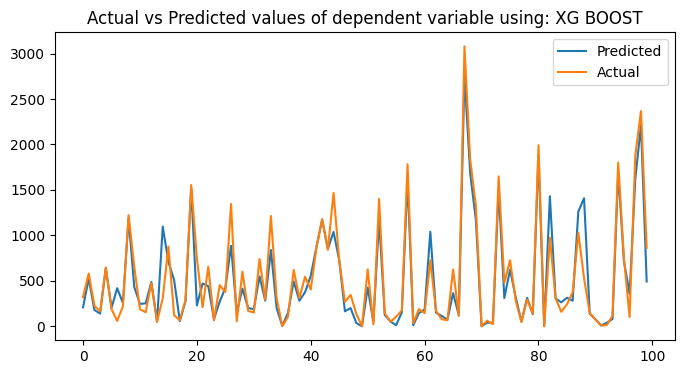

In [34]:
# Actual vs predicted values of dependent variables sample of 100 values

y_pred=xg_tuned_regressor.predict(x_test)
plt.figure(figsize=(8,4))
plt.plot((y_pred[:100])**2)
plt.plot(np.array((y_test[:100])**2))
plt.legend(["Predicted","Actual"])
plt.title('Actual vs Predicted values of dependent variable using: XG BOOST')
plt.show()


###<b> 12.4 Gradiant Boosting Regressor

In [35]:
# GBM model
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(25,31)}
# finding best parameters
gb_gridsearch = GridSearchCV(gb_model,gb_params,cv=5,scoring='neg_mean_squared_error')
gb_gridsearch.fit(x_train,y_train)
gb_gridsearch.best_params_

{'min_samples_leaf': 26, 'n_estimators': 500}

In [38]:
#Hyper Parameter Tuning with best Parameter
gb_tuned_regressor = GradientBoostingRegressor(n_estimators=500,
                                               min_samples_leaf=26,
                                               random_state=0)
calc_model_result(gb_tuned_regressor,'GradientBoostingReg_Hyper_tuned')

In [39]:
#Result of all algorithm
model_data = pd.DataFrame(model_data)
model_data

,name,MAE_train,MAE_test,r2_score_train,r2_score_test,RMSE score_train,RMSE score_test
0,LinearRegression:,5.59,5.66,0.65,0.65,0.81,0.80
1,Lasso:,8.50,8.69,0.25,0.23,0.50,0.48
2,Ridge:,5.60,5.65,0.65,0.65,0.81,0.81
3,ElasticNet:,9.43,9.55,0.15,0.13,0.38,0.37
4,DecisionTreeRegressor:,0.00,3.66,1.00,0.80,1.00,0.90
5,RandomForestRegressor:,1.02,2.86,0.99,0.88,0.99,0.94
6,GradientBoostingRegressor:,3.32,3.51,0.87,0.86,0.93,0.92
7,XGBRegressor:,1.51,2.87,0.97,0.89,0.98,0.94
8,Lasso_Hyper_tuned,5.87,6.00,0.62,0.62,0.79,0.79
9,Ridge_Hyper_tuned,5.59,5.66,0.65,0.65,0.81,0.81


Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: GRADIENT BOOSTING MACHINE (GBM)')

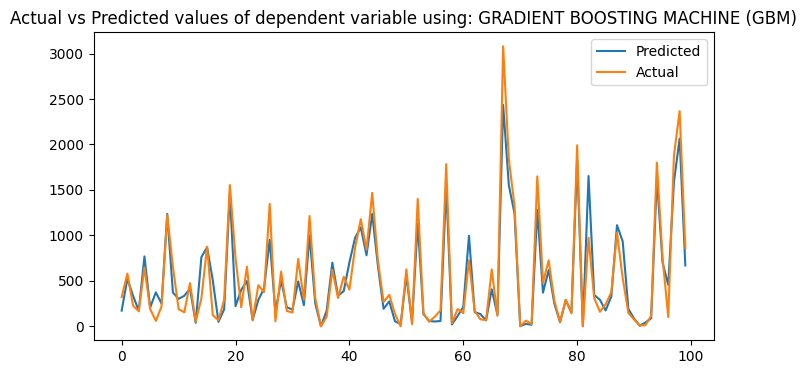

In [40]:
# Actual vs predicted values of dependent variables
y_pred = gb_tuned_regressor.predict(x_test)
plt.figure(figsize = (8,4))
plt.plot((y_pred[:100]) **2)
plt.plot(np.array((y_test[:100]) **2))
plt.legend(['Predicted' , 'Actual'])
plt.title('Actual vs Predicted values of dependent variable using: GRADIENT BOOSTING MACHINE (GBM)')

##<b> 13. Features Importance

### <b>13.1 Random Forest Imprtance Features

<Axes: title={'center': 'Feature Importance : RANDOM FOREST'}>

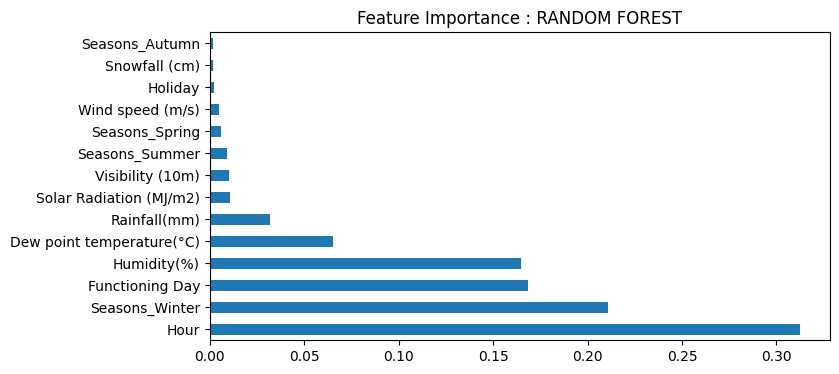

In [41]:
#plot a barplot  of importance features
rf_imp = pd.Series(rf_tuned_regressor.feature_importances_,index = x.columns)
plt.figure(figsize=(8,4))
plt.title('Feature Importance : RANDOM FOREST')
plt.xlabel('Relative Importance')
rf_imp.nlargest(20).plot(kind  = 'barh')

###<b> 13.2 Gradient boosting feature importances

<Axes: title={'center': 'Feature Importance : GRADIENT BOOSTING'}>

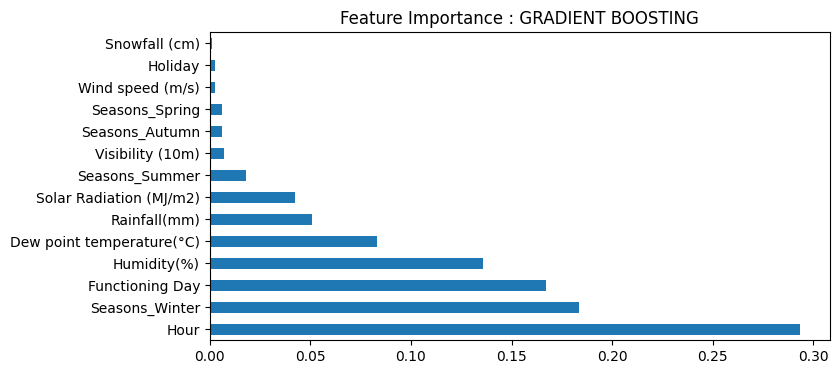

In [47]:
#plot a barplot  of importance features

gb_imp = pd.Series(gb_tuned_regressor.feature_importances_, index = x.columns)
plt.figure(figsize = (8,4))
plt.title('Feature Importance : GRADIENT BOOSTING')
plt.xlabel('Relative Importance')
gb_imp.nlargest(20).plot(kind = 'barh')

###<b> 13.3 XG boost feature importances

<Axes: title={'center': 'Feature Importance : XG BOOST'}>

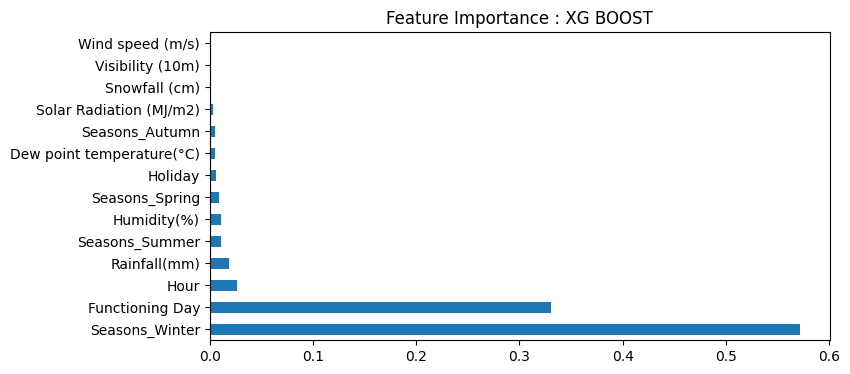

In [49]:
xg_imp = pd.Series(xg_tuned_regressor.feature_importances_ , index = x.columns)
plt.figure(figsize = (8,4))
plt.title('Feature Importance : XG BOOST')
xg_imp.nlargest(20).plot(kind='barh')

##<b>14. Summary and conclusions:



* #### As we have calculated MAE,MSE,RMSE and R2 score for each model. Based on r2 score will decide our model performance.
* #### assumption: if the differnece of R2 score between Train data and Test is more than 5 % we will consider it as overfitting.

###<b> Linear,Lasso,Ridge and ElasticNet.

* #### From The above data frame, we can see that linear,Lasso,Ridge  and Elastic  regression models have maximum R2 scores(65%) on both training and test data.(Even after using GridserachCV we have got similar results as of base models).

###<b> Decision Tree Regressor:
* #### On Decision tree regressor model, without hyperparameter tuning we got r2 score as 100% on training data and on test data 81%. Testing performance very low  compared to training data .So it was a overfitted model.

###<b> Random Forest:

* #### On Random Forest regressor model, without hyperparameter tuning we got r2 score as 99% on training data and 89% on test data. Testing performance very low  compared to training data .So it was a overfitted model, as per our assumption
* #### After hyperparameter tuning we got r2 score as 91% on training data and 86% on test data which is  very good for us.

###<b> Gradient Boosting Regression(Gradient Boosting Machine):

* #### On Gradient Boosting Regression model, without hyperparameter tuning we got r2 score as 87% on training data and 86% on test data.Our model performed well without hyperparameter tuning.
* #### After hyperparameter tuning we got r2 score as 91% on training data and 89% on test data,thus we improved the model performance by hyperparameter tuning.

###<b> XG Boost Regression:

 * #### On XG Boost Regression model, without hyperparameter tuning we got r2 score as 87% on training data and 86% on test data.Our model performed well without hyperparameter tuning.
* #### After hyperparameter tuning we got r2 score as 97% on training data and 96% on test data,thus we improved the model performance by hyperparameter tuning.

* ## Thus Gradient Boosting Regression(GridSearchCV), Random forest(GridSearchCV) gives good r2 scores. We can deploy this models.


###<b> Feature Importance:

 * #### Thus Gradient Boosting Regression(GridSearchCV), Random forest(GridSearchCV) have 'Hour' is the most importance features then Seasons_winter, Funtioning day, Humidity, Dew point temprature.



 #   